In [101]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)  # show all columns

In [102]:
df = pd.read_csv("../data/detroit_open_data_portal_property_sales.csv")

##OPTIONAL FILTER ON PROPERTY CLASS CODE
# 401 - Residental - Improved (not vancant)
# 402 - Vancant Residential Property
# 403 - Residential - Common Element/Assessed with Others (i.e Condo)
# 201 - Commerical - Improved 
# 202 - Commerical (Vacant)
# 301 - Industrial Improved
df = df[df['Property Class Code'] == 402]



df["Sale Date"] = pd.to_datetime(df["Sale Date"])
# Extract month and year
df["month"] = df["Sale Date"].dt.month
df["year"] = df["Sale Date"].dt.year

df.head(3)

c:\Users\matt\Desktop\DataProjects\detroit_property_prices\venv\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (19,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Sales ID,Parcel ID,Address,Sale Date,Sale Price,Grantor,Grantee,Liber Page,Terms of Sale,Sale Verification,Sale Instrument,sale_number,Property Transfer Percentage,Multi Parcel Sale,Property Class Code,Property Class Description,ECF Neighborhood,Neighborhood,Council District,Zip Code,Street Number,Street Prefix,Street Name,Street Type,Unit Number,Longitude,Latitude,ObjectId,x,y,month,year
237,1476224,22059361-5,8651 ST MARYS,2011-08-30,500,WAYNE COUNTY TREASURER,DETROIT LAND BANK AUTHORITY,NaN,13-GOVERNMENT,PROPERTY TRANSFER AFFIDAVIT,PTA,1,0,False,402.00,RESIDENTIAL VACANT,7R709,Warren Ave Community,7.00,48228,8651.00,NaN,ST MARYS,NaN,NaN,-83.20,42.36,2509,-9262289.08,5214587.55,8,2011
261,1480850,21065621.,3966 BEACONSFIELD,2012-03-15,1,CITY OF DETROIT,DETROIT LAND BANK AUTHORITY,NaN,21-NOT USED/OTHER,PROPERTY TRANSFER AFFIDAVIT,PTA,1,0,False,402.00,RESIDENTIAL VACANT,4R417,Morningside,4.00,48224,3966.00,NaN,BEACONSFIELD,NaN,NaN,-82.94,42.39,2533,NaN,NaN,3,2012
302,1488596,01001533.,252 E PALMER,2012-11-15,7500,ART CENTER TOWN&CARRIAGE HOMES LLC,LANCASTER CONDOMINIUM ASSOCIATION,NaN,12-FROM LENDING INSTITUTION NOT EXPOSED,PROPERTY TRANSFER AFFIDAVIT,PTA,1,100,False,402.00,RESIDENTIAL VACANT,CNDOD,Cultural Center,5.00,48202,252.00,E,PALMER,NaN,NaN,-83.06,42.36,3066,-9246693.46,5215525.30,11,2012


In [103]:
# Basic statistics
print(df.shape)
print(f"Number of unique Sales: {df['Sales ID'].nunique()}")

# Get earliest and latest dates
print(f"Earliest sales date: {df['Sale Date'].min()}")
print(f"Most recent sales date: {df['Sale Date'].max()}")
print("--------------------")

# Number of NaN values per column
print(f"NaN values (% of rows) per column:\n{(df.isna().sum() / len(df) * 100).round(2)}%")
print("--------------------")

## Number of Zip Codes
# Cleaning Zip Codes to just be the first part before the - 
# Example: 48235-1546 will now be 48235
df['Zip Code'] = df['Zip Code'].str.split('-').str[0]
print(f"Number of Unique Zip Codes {len(df['Zip Code'].value_counts())}")
print(f"Zip Codes {df['Zip Code'].value_counts()}")


(69659, 32)
Number of unique Sales: 69659
Earliest sales date: 2011-01-01 00:00:00
Most recent sales date: 2025-09-10 00:00:00
--------------------
NaN values (% of rows) per column:
Sales ID                        0.00
Parcel ID                       0.03
Address                         0.00
Sale Date                       0.00
Sale Price                      0.00
Grantor                         0.02
Grantee                         0.30
Liber Page                     34.50
Terms of Sale                   0.00
Sale Verification               0.40
Sale Instrument                 0.00
sale_number                     0.00
Property Transfer Percentage    0.00
Multi Parcel Sale               0.00
Property Class Code             0.00
Property Class Description      0.00
ECF Neighborhood                0.00
Neighborhood                    2.19
Council District                2.19
Zip Code                        0.14
Street Number                   0.14
Street Prefix                  94.04
Str

## Sales Over Time

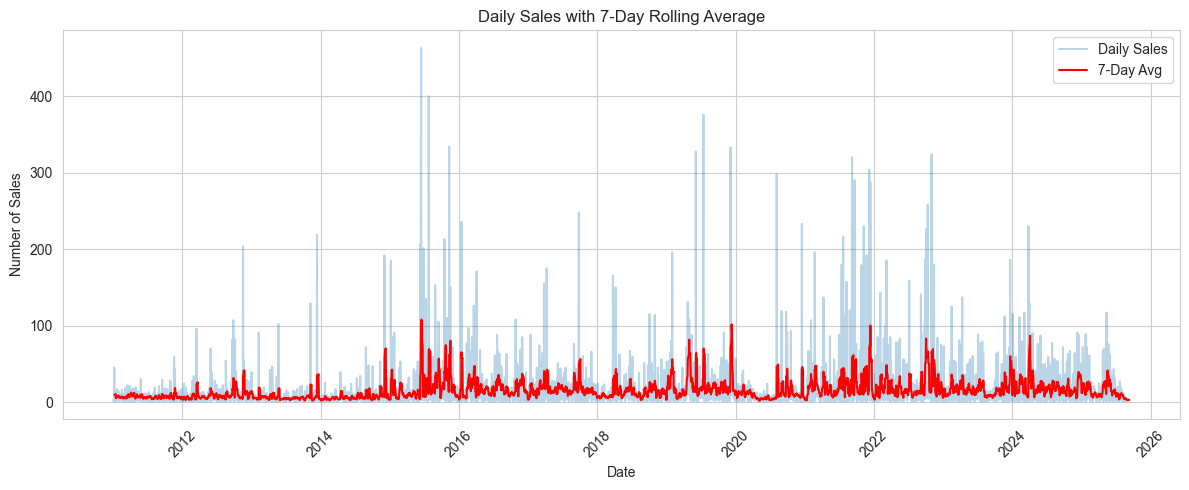

In [104]:
# Daily
sales_by_day = df.groupby("Sale Date")["Sales ID"].count().reset_index()
sales_by_day["rolling_7d"] = sales_by_day["Sales ID"].rolling(7).mean()

plt.figure(figsize=(12,5))
plt.plot(sales_by_day["Sale Date"], sales_by_day["Sales ID"], alpha=0.3, label="Daily Sales")  # faded raw
plt.plot(sales_by_day["Sale Date"], sales_by_day["rolling_7d"], color="red", label="7-Day Avg")   # smoothed
plt.title("Daily Sales with 7-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [105]:
top_10_days = sales_by_day.sort_values(by="Sales ID", ascending=False).head(10)
print("Average sales per day:", sales_by_day["Sales ID"].mean())
top_10_days

Average sales per day: 15.710193955796122


,Sale Date,Sales ID,rolling_7d
1327,2015-06-15,463,103.43
1363,2015-07-25,400,68.00
2548,2019-07-15,376,67.14
1453,2015-11-10,334,60.57
2665,2019-12-05,333,70.71
2518,2019-06-05,328,61.29
3553,2022-11-01,324,57.43
3188,2021-09-07,320,54.14
3268,2021-12-07,304,70.71
2847,2020-08-05,298,46.14


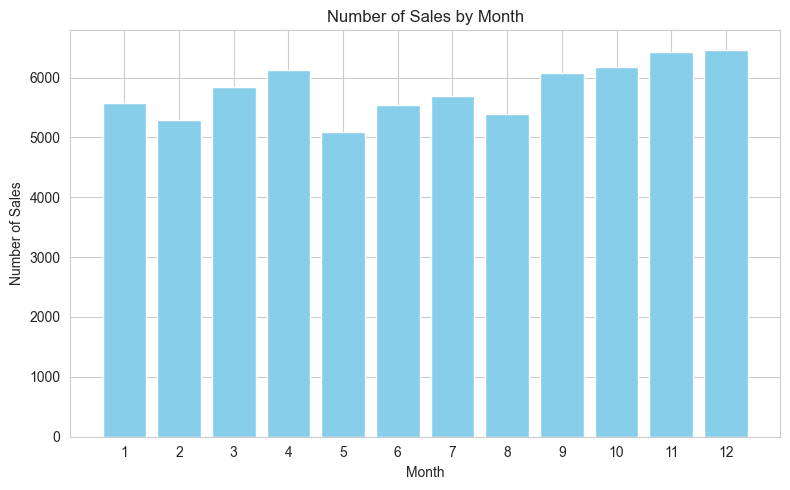

In [106]:
# Group by month only
sales_by_month = df.groupby("month")["Sales ID"].count().reset_index()

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(sales_by_month["month"], sales_by_month["Sales ID"], color="skyblue")

plt.title("Number of Sales by Month")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.xticks(range(1,13))  # show months 1–12
plt.tight_layout()
plt.show()

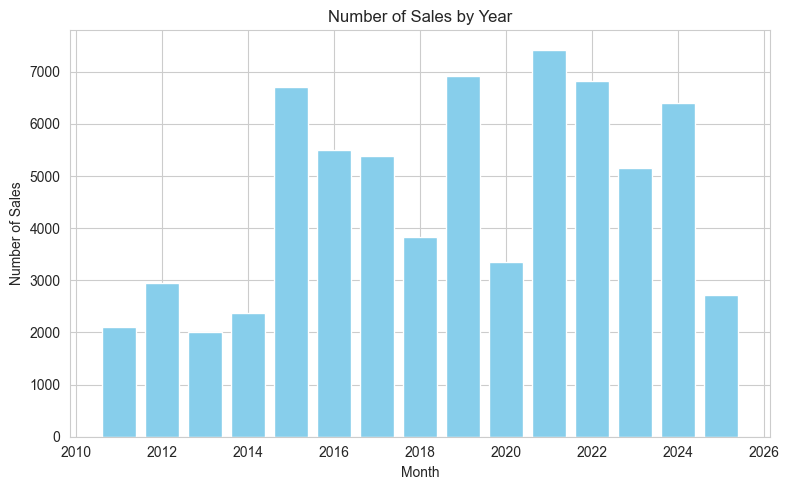

In [107]:
# Group by year only
sales_by_year = df.groupby("year")["Sales ID"].count().reset_index()

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(sales_by_year["year"], sales_by_year["Sales ID"], color="skyblue")

plt.title("Number of Sales by Year")
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()

## Sales Price

In [108]:
# Price of Sales
pd.set_option("display.float_format", "{:.2f}".format)
percentiles = [0.01, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99]
print(df['Sale Price'].describe(percentiles=percentiles))
print("------------------")

print("Largest n sales in Detroit Dataset")
print(df[['Address', 'Sale Date', 'Sale Price']].sort_values(by='Sale Price', ascending=False).head(20))


count      69659.00
mean       15177.67
std       142255.71
min            0.00
1%             0.00
5%             0.00
10%            0.00
25%            1.00
50%          100.00
75%          500.00
90%        10800.00
95%        52642.50
99%       290000.00
max     17800000.00
Name: Sale Price, dtype: float64
------------------
Largest n sales in Detroit Dataset
                  Address  Sale Date  Sale Price
417327       5187 MAXWELL 2023-08-24    17800000
223137       1802 MELDRUM 2018-05-21     7700000
223141       1810 MELDRUM 2018-05-21     7700000
142380           433 ERLE 2015-02-26     7100000
337469        4891 RADNOR 2021-05-26     6275000
337474     4890 FARMBROOK 2021-05-26     6275000
195653       5750 LINCOLN 2017-06-19     5850000
10126         6000 ASHTON 2013-08-16     5300000
303281     4890 FARMBROOK 2020-12-14     4956736
303282        4891 RADNOR 2020-12-14     4956736
381814  1791 WELLESLEY DR 2022-03-01     4900000
381795  1767 WELLESLEY DR 2022-03-01     4900

The 0.9th percentile threshold is: $10,800.00


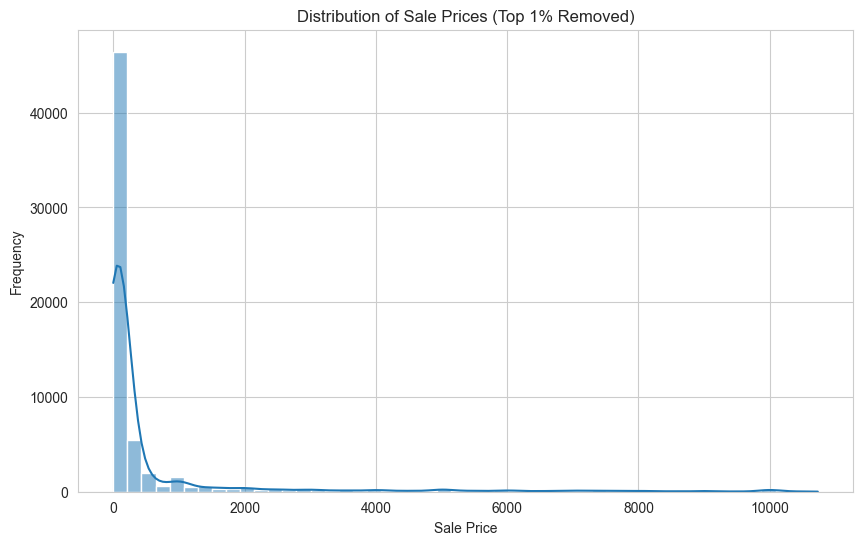

In [109]:
## The Max Sale Price is throwing off the plot... since removed to anythhing less than the 99th percentile
quantile =.90
upper_limit = df['Sale Price'].quantile(quantile)
print(f"The {quantile}th percentile threshold is: ${upper_limit:,.2f}")

df_trimmed = df[df['Sale Price'] < upper_limit]

plt.figure(figsize=(10, 6))
sns.histplot(df_trimmed['Sale Price'], bins=50, kde=True)
plt.title('Distribution of Sale Prices (Top 1% Removed)')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

c:\Users\matt\Desktop\DataProjects\detroit_property_prices\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


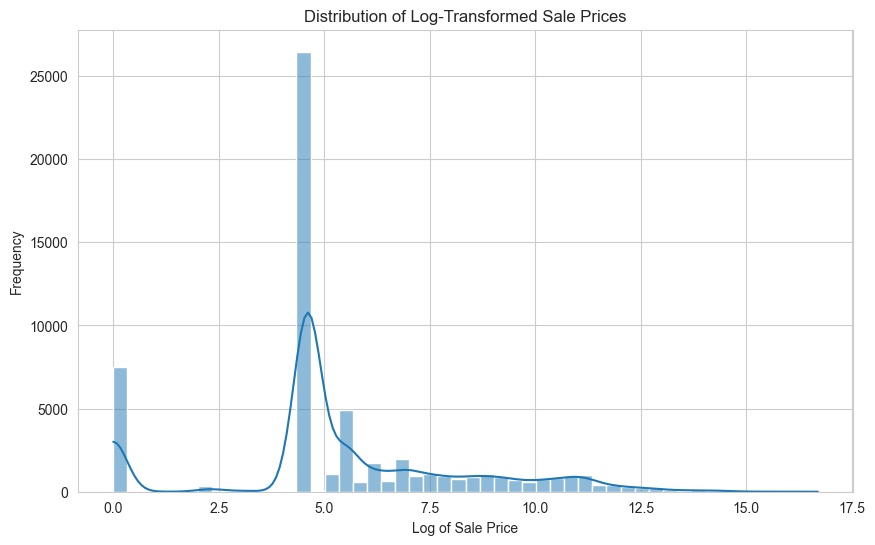

In [110]:
# Distrubution of the Sale Price (Outlier is skewing the plot)
plt.figure(figsize=(10, 6))
df['Log Sale Price'] = np.log(df['Sale Price'])
sns.histplot(df['Log Sale Price'], kde=True, bins=50)
plt.title('Distribution of Log-Transformed Sale Prices')
plt.xlabel('Log of Sale Price')
plt.ylabel('Frequency')
plt.show()

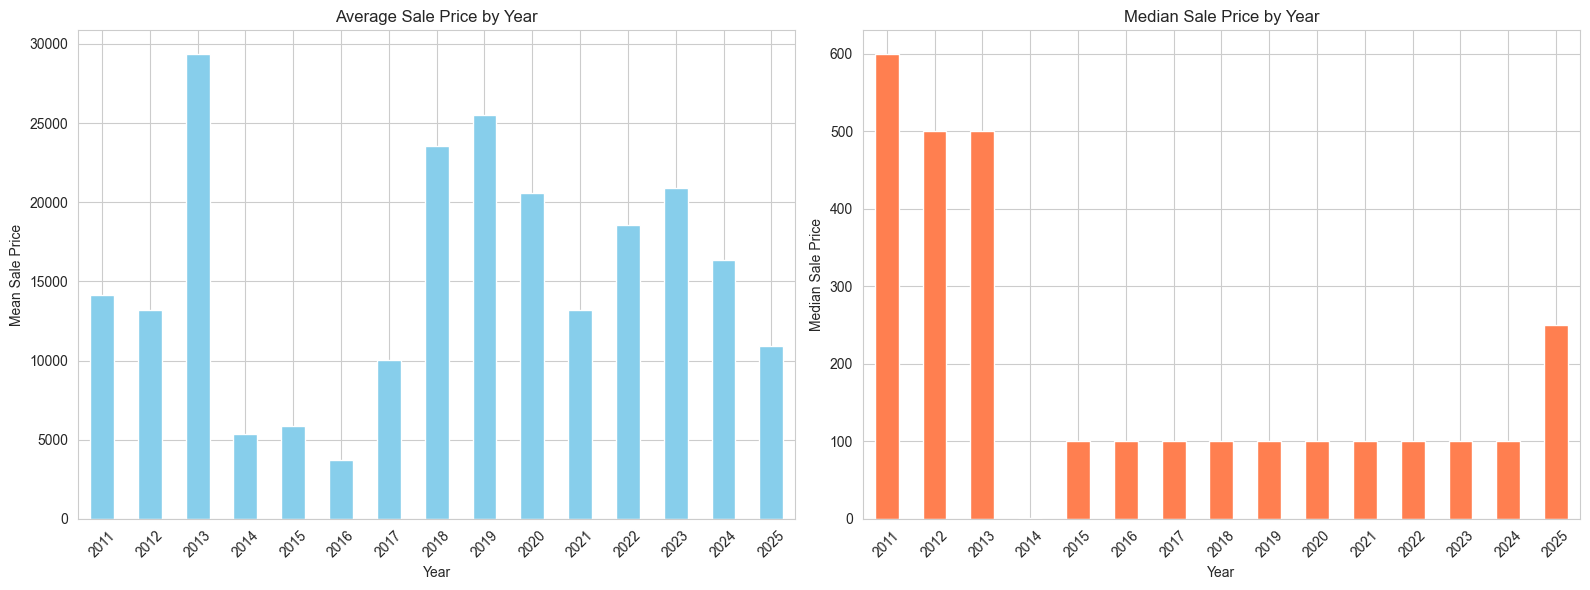

In [111]:
# Is the average price of property in Detroit on the rise..? Median...? 

# Code is from Gemini
# Set up a nicer style for the plots (optional)
sns.set_style("whitegrid")

# --- Step 1: Group the DataFrame and calculate the mean and median ---
mean_prices = df.groupby('year')['Sale Price'].mean()
median_prices = df.groupby('year')['Sale Price'].median()

# --- Step 2: Create a figure with two subplots side-by-side ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# --- Step 3: Plot the mean prices on the first subplot (ax1) ---
mean_prices.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Average Sale Price by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Sale Price')
ax1.tick_params(axis='x', rotation=45) # Rotate x-axis labels for readability

# --- Step 4: Plot the median prices on the second subplot (ax2) ---
median_prices.plot(kind='bar', ax=ax2, color='coral')
ax2.set_title('Median Sale Price by Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Median Sale Price')
ax2.tick_params(axis='x', rotation=45) # Rotate x-axis labels

# --- Step 5: Adjust layout and display the plots ---
plt.tight_layout() # This ensures titles and labels don't overlap
plt.show()

## Location 

In [112]:
# Number of neighborhoods (done)
# price by zipcodes (done)
# Common streets (done)
# Look into street types (done)
# property class codes (look into this) --> Good to know... need to filter data on this


In [113]:
print(df['Neighborhood'].nunique())
print(df['Neighborhood'].value_counts().head(20))
print("------------")
print("Highest Median Price by Neighborhood")
print(df.groupby(['Neighborhood'])['Sale Price'].median().sort_values(ascending=False).head(10))

190
Claytown              2669
Midwest               2437
Chadsey Condon        2173
Brightmoor            2054
Airport Sub           1878
Central Southwest     1876
McDougall-Hunt        1822
East Village          1595
Springwells           1440
North End             1419
Warrendale            1379
Morningside           1328
Islandview            1318
Riverbend             1278
Jefferson Chalmers    1125
Dexter-Linwood        1117
Poletown East         1093
Gratiot-Grand          961
West End               953
Nolan                  925
Name: Neighborhood, dtype: int64
------------
Highest Median Price by Neighborhood
Neighborhood
Conner Creek Industrial   375000.00
Lafayette Park            250000.00
Tech Town                 222000.00
Tri-Point                  88505.00
Brush Park                 65000.00
Indian Village             61000.00
New Center Commons         45000.00
Rosedale Park              40750.00
Oakwood Heights            37000.00
Elmwood Park               32250.00


In [114]:
df_401 = df[df['Property Class Code'] == 401]

# Closer to Downtown and on the River
# Now, perform the groupby and sorting on the filtered DataFrame
top_10_most_expensive_401 = (
    df_401
    .groupby(['Neighborhood'])['Sale Price']
    .median()
    .sort_values(ascending=False)
    .head(10)
)
top_10_most_expensive_401

Series([], Name: Sale Price, dtype: float64)

In [115]:
print(df['Street Name'].value_counts())
print("------------------------")
print(df['Street Type'].value_counts())

PHILIP        393
MANISTIQUE    385
HELEN         344
FISCHER       328
MITCHELL      309
             ... 
MULBERRY        1
STUART          1
ST ANTOINE      1
MONROE          1
MADOLA          1
Name: Street Name, Length: 1570, dtype: int64
------------------------
ST      2152
DR       490
BLVD     378
CT       300
PL       282
RD       216
PARK     106
AVE       59
TER       22
CIR       21
CRES       4
TRL        1
Name: Street Type, dtype: int64


In [116]:
# Plenty of Downtown Detroit here
print(df.groupby(['Zip Code'])['Sale Price'].median().sort_values(ascending=False).head(10))

Zip Code
48201   20500.00
48239     900.00
48217     478.50
48236     250.00
48226     250.00
48203     100.00
48238     100.00
48235     100.00
48234     100.00
48228     100.00
Name: Sale Price, dtype: float64


In [117]:
df['Property Class Code'].value_counts().head()
# 401 - Residental - Improved (not vancant)
# 402 - Vancant Residential Property
# 403 - Residential - Common Element/Assessed with Others (i.e Condo)
# 201 - Commerical - Improved 
# 202 - Commerical (Vacant)
# 301 - Industrial Improved

402.00    69659
Name: Property Class Code, dtype: int64

In [118]:
df.head(3)

,Sales ID,Parcel ID,Address,Sale Date,Sale Price,Grantor,Grantee,Liber Page,Terms of Sale,Sale Verification,Sale Instrument,sale_number,Property Transfer Percentage,Multi Parcel Sale,Property Class Code,Property Class Description,ECF Neighborhood,Neighborhood,Council District,Zip Code,Street Number,Street Prefix,Street Name,Street Type,Unit Number,Longitude,Latitude,ObjectId,x,y,month,year,Log Sale Price
237,1476224,22059361-5,8651 ST MARYS,2011-08-30,500,WAYNE COUNTY TREASURER,DETROIT LAND BANK AUTHORITY,NaN,13-GOVERNMENT,PROPERTY TRANSFER AFFIDAVIT,PTA,1,0,False,402.00,RESIDENTIAL VACANT,7R709,Warren Ave Community,7.00,48228,8651.00,NaN,ST MARYS,NaN,NaN,-83.20,42.36,2509,-9262289.08,5214587.55,8,2011,6.21
261,1480850,21065621.,3966 BEACONSFIELD,2012-03-15,1,CITY OF DETROIT,DETROIT LAND BANK AUTHORITY,NaN,21-NOT USED/OTHER,PROPERTY TRANSFER AFFIDAVIT,PTA,1,0,False,402.00,RESIDENTIAL VACANT,4R417,Morningside,4.00,48224,3966.00,NaN,BEACONSFIELD,NaN,NaN,-82.94,42.39,2533,NaN,NaN,3,2012,0.00
302,1488596,01001533.,252 E PALMER,2012-11-15,7500,ART CENTER TOWN&CARRIAGE HOMES LLC,LANCASTER CONDOMINIUM ASSOCIATION,NaN,12-FROM LENDING INSTITUTION NOT EXPOSED,PROPERTY TRANSFER AFFIDAVIT,PTA,1,100,False,402.00,RESIDENTIAL VACANT,CNDOD,Cultural Center,5.00,48202,252.00,E,PALMER,NaN,NaN,-83.06,42.36,3066,-9246693.46,5215525.30,11,2012,8.92
